<a href="https://colab.research.google.com/github/Josphat-Malombe/deep_learning/blob/main/model_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn

device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=1000, noise=0.03, random_state=42)

In [4]:
#splitting data
import torch
from sklearn.model_selection import train_test_split

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
class CircleModel002(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()
    #self.sigmoid=nn.Sigmoid()

  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_002=CircleModel002()

In [6]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [15]:
criterion=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_002.parameters(), lr=0.1)

In [16]:
torch.manual_seed(42)
epochs=1000

for epoch in range(epochs):
  model_002.train()
  y_logits=model_002(X_train).squeeze(1)
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=criterion(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_002.eval()
  with torch.inference_mode():
    test_logits=model_002(X_test).squeeze(1)
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=criterion(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch%100==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.68023 | Acc: 62.75% | Test Loss: 0.68131 | Test Acc: 60.50%
Epoch: 100 | Loss: 0.67232 | Acc: 66.75% | Test Loss: 0.67508 | Test Acc: 64.00%
Epoch: 200 | Loss: 0.65857 | Acc: 81.88% | Test Loss: 0.66430 | Test Acc: 76.00%
Epoch: 300 | Loss: 0.63337 | Acc: 90.12% | Test Loss: 0.64373 | Test Acc: 79.50%
Epoch: 400 | Loss: 0.58716 | Acc: 92.00% | Test Loss: 0.60391 | Test Acc: 84.00%
Epoch: 500 | Loss: 0.50224 | Acc: 95.75% | Test Loss: 0.53005 | Test Acc: 90.50%
Epoch: 600 | Loss: 0.36597 | Acc: 98.88% | Test Loss: 0.40557 | Test Acc: 97.00%
Epoch: 700 | Loss: 0.40124 | Acc: 77.00% | Test Loss: 0.48077 | Test Acc: 70.50%
Epoch: 800 | Loss: 0.36012 | Acc: 80.00% | Test Loss: 0.45554 | Test Acc: 72.50%
Epoch: 900 | Loss: 0.27240 | Acc: 88.50% | Test Loss: 0.36072 | Test Acc: 79.00%


In [23]:
model_002.eval()
with torch.inference_mode():
  y_pred=torch.round(torch.sigmoid(y_logits)).squeeze()
  print(y_pred[:10])
  print(y[:10])

tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1.])
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        1., 0.])


In [27]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("File already exists")
else:
  print("Downloading file")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)
  from helper_functions import plot_decision_boundary, plot_predictions

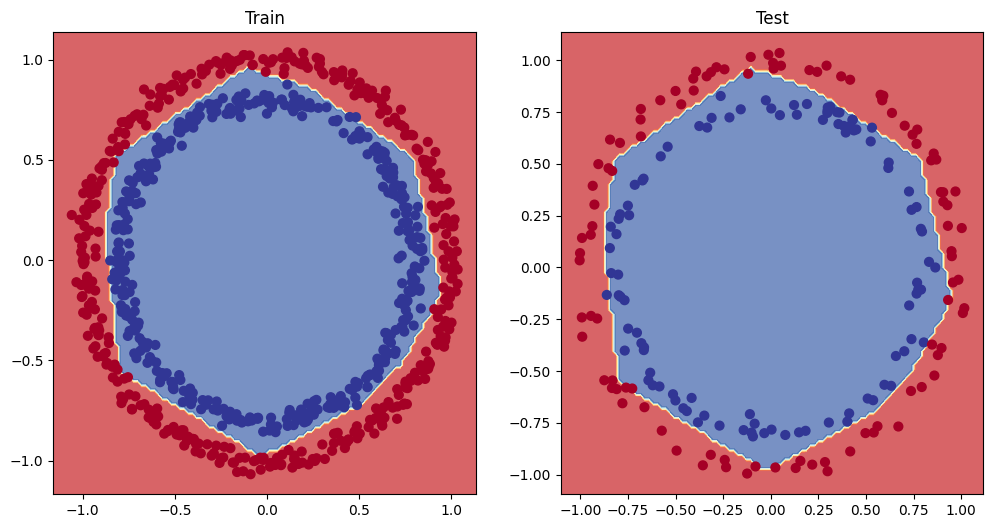

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_002,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_002,X_test,y_test)
plt.show()